## Teste Z para duas amostras independentes 

- Número de amostras maior ou igual a 30.

- Necessita conhecimento do desvio padrão.

In [4]:
import numpy as np
import pandas as pd

In [5]:
enem_sp = pd.read_csv('enem_2019_tratado.csv',
                      sep=',', encoding='iso-8859-1')

In [6]:
enem_sp.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


Objetivo:
Analisar a diferença entre as médias de mulheres e homens para a nota de um dos componentes de redação do colégio x.

In [7]:
colegiox = enem_sp.loc[enem_sp.CO_ESCOLA == 35017632.0]

In [8]:
colegiox.shape

(41, 28)

In [9]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,...,537.1,Inglês,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,pública,35017632.0,...,451.9,Inglês,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Não
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,pública,35017632.0,...,506.4,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Não
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,pública,35017632.0,...,59.5,Inglês,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,pública,35017632.0,...,510.6,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim


In [10]:
colegiox_mulher = colegiox.loc[colegiox.SEXO == 'F']

In [11]:
colegiox_mulher.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,pública,35017632.0,...,451.9,Inglês,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Não
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,pública,35017632.0,...,506.4,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Não
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,pública,35017632.0,...,510.6,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim
84,"1,90E+11",Águas de Lindóia,19,F,1,branca,1,2,pública,35017632.0,...,420.6,Espanhol,1.0,140.0,40.0,40.0,120.0,20.0,360.0,Sim
91,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,pública,35017632.0,...,537.9,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim


In [12]:
colegiox_mulher.shape

(28, 28)

In [13]:
colegiox_homem = colegiox.loc[colegiox.SEXO == 'M']

In [14]:
colegiox_homem.shape

(13, 28)

In [15]:
colegiox_homem.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,...,537.1,Inglês,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,pública,35017632.0,...,59.5,Inglês,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim
85,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,...,508.2,Espanhol,1.0,140.0,140.0,120.0,160.0,120.0,680.0,Sim
108151,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,...,705.3,Inglês,1.0,140.0,160.0,120.0,140.0,100.0,660.0,Sim
182519,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,pública,35017632.0,...,480.9,Espanhol,1.0,100.0,120.0,100.0,100.0,100.0,520.0,Sim


1) Analisar a classificação das variáveis

In [16]:
colegiox.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

2) Analisar valores missing

In [17]:
colegiox.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

3) Analisar outliers

In [18]:
import plotly.express as px

In [19]:
grafico = px.box(colegiox_mulher, y="COMP5")
grafico.show()

In [20]:
grafico = px.box(colegiox_homem, y="COMP5")
grafico.show()

4) Analisar Normalidade

CRITÉRIOS:

Nível de significância de 0,05 ou 5% (MAIS UTILIZADO)

Quando p > 0,05 (distribuição normal).

In [21]:
import scipy.stats as stats

In [22]:
# Teste Shapiro-Wilk
stats.shapiro(colegiox_mulher.COMP5)

ShapiroResult(statistic=0.9521203637123108, pvalue=0.2238943725824356)

In [23]:
# Teste Shapiro-Wilk
stats.shapiro(colegiox_homem.COMP5)

ShapiroResult(statistic=0.942307710647583, pvalue=0.48747217655181885)

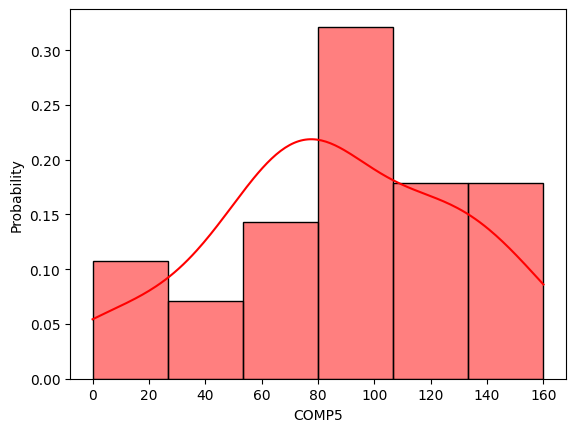

In [24]:
import seaborn as sns
sns.histplot(colegiox_mulher, x='COMP5', bins=6, color="red", kde=True, stat="probability");

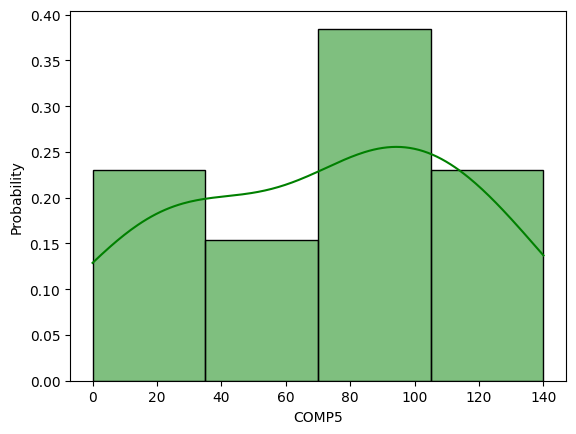

In [25]:
sns.histplot(colegiox_homem, x='COMP5', bins=4, color="green", kde=True, stat="probability");

In [26]:
import scipy.stats as stats
import matplotlib.pyplot as plt

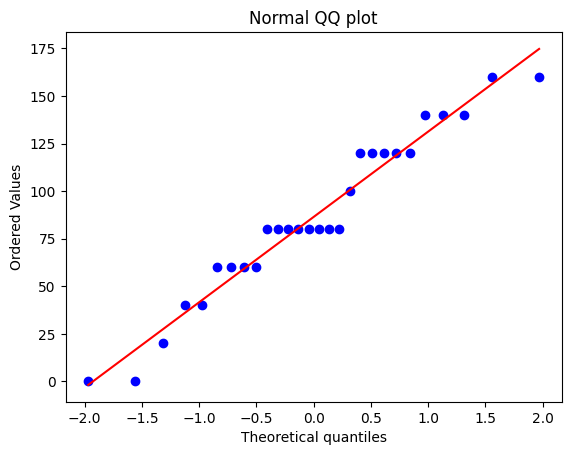

In [27]:
stats.probplot(colegiox_mulher['COMP5'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

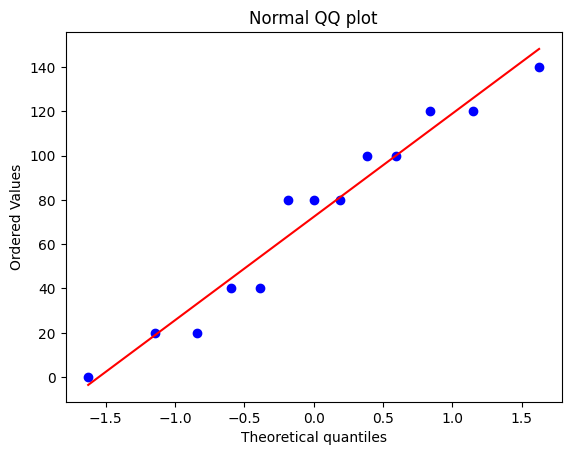

In [28]:
stats.probplot(colegiox_homem['COMP5'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

5) Homogeneidade das variâncias (HOMOCEDASTICIDADE)

Para esse teste não é relevante, mas vale a análise.

Variabilidade dos erros constante.

- Ho = variâncias homogêneas : p > 0.05

- Ha = variâncias não homogêneas : p <= 0.05

In [29]:
# teste de Levene
from scipy.stats import levene

In [30]:
stat, p = levene(colegiox_mulher.COMP5, colegiox_homem.COMP5, center='mean')
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: 0.07
p-valor: 0.7899416696


**TESTE Z para duas amostras independentes**

- Comparação das Médias das notas do componente 5 da redação entre homens e mulheres do colégio X.

- Ho = Não há diferença entre as médias entre homens e mulheres: p > 0.05

Ha = Há diferença entre as médias entre homens e mulheres : p <= 0.05

In [31]:
from statsmodels.stats.weightstats import ztest

In [32]:
stat, p = ztest(colegiox_mulher.COMP5, colegiox_homem.COMP5)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: 0.96
p-valor: 0.3394918950042334


In [ ]:
colegiox_mulher.COMP5.describe()

In [ ]:
colegiox_homem.COMP5.describe()

**INTERPRETAÇÃO:**

Teste estatístico: 0,96

p_valor = 0,339

Conclusão: Estatisticamente, com intervalo de confiança de 95%, não se pode concluir que a média do componente 5 de redação do colegio X seja diferente entre homens e mulheres.



### Anotação Extra

O que realmente significa falar de um intervalo de confiança?

O intervalo de confiança é uma medida estatística que fornece uma faixa de valores dentro da qual é razoável supor que um parâmetro de interesse, como a média de uma população, está contido. Em outras palavras, é uma estimativa da incerteza associada a uma estimativa pontual.